In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from glob import glob
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dropout, Activation, UpSampling2D, GlobalMaxPooling2D, multiply
from tensorflow.keras.backend import max
from keras_unet_collection import models, base, utils

2023-04-17 17:04:05.551341: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [3]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [5]:
R = Runner(verbose=True, classifier='unetplus', base_filters=8)

*** GP2 ***
Working directory: /tmp/tmpf6gch1s2GP2
Verbose mode active!


/home/ryan.zurrin001/miniconda3/envs/O/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2023-04-17 17:04:20.201585: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-17 17:04:20.335117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-17 17:04:20.335159: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-17 17:04:20.339053: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-17 17:04:20.339087: I tensorflow/stream_executor/platform/default

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 8)  80          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 8)  32          conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 8)  0           batch_normalization[0][0]        
______________________________________________________________________________________________

2023-04-17 17:04:20.351557: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 17:04:20.355775: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-17 17:04:20.363173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-04-17 17:04:20.363200: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-17 17:04:21.061312: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecuto

In [6]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [7]:
images.shape

(10000, 512, 512, 1)

In [8]:
masks.shape

(10000, 512, 512, 1)

In [9]:
print(images.max())

255


In [10]:
print(images.min())

0


In [11]:
print(masks.max())

True


In [12]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [13]:
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [14]:
RUNS = 10

In [ ]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0


2023-04-17 17:05:28.359103: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-17 17:05:28.379051: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-17 17:05:31.684685: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-17 17:05:32.697601: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-17 17:05:33.773301: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-17 17:05:33.773324: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-17 17:05:33.773795: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-17 17:05:33.852775: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-17 17:05:34.948221: I tensorflow/stream_exec

8/8 [==============================] - 30s 2s/step - loss: 1.1257 - dice_coef: 0.1643 - val_loss: 1.1060 - val_dice_coef: 0.1703


2023-04-17 17:06:02.602052: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
8/8 [==============================] - 10s 1s/step - loss: 1.1153 - dice_coef: 0.1682 - val_loss: 1.0772 - val_dice_coef: 0.1702
Epoch 3/100
8/8 [==============================] - 10s 1s/step - loss: 1.0948 - dice_coef: 0.1754 - val_loss: 1.0553 - val_dice_coef: 0.1700
Epoch 4/100
8/8 [==============================] - 10s 1s/step - loss: 1.0712 - dice_coef: 0.1829 - val_loss: 1.0353 - val_dice_coef: 0.1697
Epoch 5/100
8/8 [==============================] - 10s 1s/step - loss: 1.0498 - dice_coef: 0.1889 - val_loss: 1.0159 - val_dice_coef: 0.1695
Epoch 6/100
8/8 [==============================] - 10s 1s/step - loss: 1.0265 - dice_coef: 0.1959 - val_loss: 0.9970 - val_dice_coef: 0.1692
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 1.0056 - dice_coef: 0.2003 - val_loss: 0.9787 - val_dice_coef: 0.1689
Epoch 8/100
8/8 [==============================] - 10s 1s/step - loss: 0.9873 - dice_coef: 0.2039 - val_loss: 0.9613 - val_dice_coef: 0.1686
Epoch 9/100
8

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

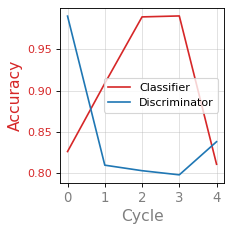

In [17]:
R.plot()